In [1]:
import sys
import sys
sys.path
sys.path.append('../')

import numpy as np
from diamonds import experiments, normal_equation, customSGD

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
scoring = {
    	'Negative MSE': 'neg_mean_squared_error',
    	'Negative MAE': 'neg_mean_absolute_error',
    	'R2': 'r2'
	}

syntect_features = ['volume', 'ratio_xy', 'ratio_xz']
val_size = .15
params = {'eta0': 0.05,
 'learning_rate': 'invscaling',
 'loss': 'squared_loss',
 'max_iter': 5000,
 # 'penalty': None Already included in the basic configuration.
         }

/root/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Discution 1
  - The Second round was used to find best parameters to train the algorithm, since there was no consistency difference between the 3 top configurations, also with the higher number of executions. 
  - We opted here to use the 3 best configurations in 5k iterations.  


In [2]:
regr = experiments.get_sklearn_sgd(params)
regr

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.05,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=5000, n_iter=None, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None,
       verbose=True, warm_start=False)

## Reevaluating the 5 Fold Cross Validation

In [3]:
X = experiments.load_train_data()
folds, (X_train, X_test, y_train, y_test) = experiments.gen_splits(X, scale=True)

### Log(price)

In [4]:
experiments.kfold_evaluate(regr, folds, scoring, log_y=True)

Evaluating 0
Evaluating 1
Evaluating 2
Evaluating 3
Evaluating 4
RMSE: 	 676.8609 +/- 18.4398
MSE:  	 458480.7184 +/- 24832.5070
MAE:  	 388.6559 +/- 9.7161
R2:   	 0.9677 +/- 0.0017


## Training with the whole Training dataset against the Validation 
   - Given the above rank we are selecting the 3 top configurations and re-running the grid with more iterations

In [5]:
regr.fit(X_train, np.log(y_train))

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.05,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=5000, n_iter=None, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None,
       verbose=False, warm_start=False)

In [6]:
y_pred = np.exp(regr.predict(X_test))

RMSE : 677.8501
MSE: 459480.7895
MAE: 381.7592
R2: 0.9650


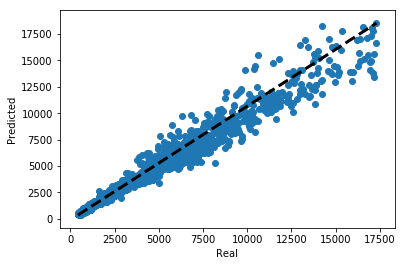

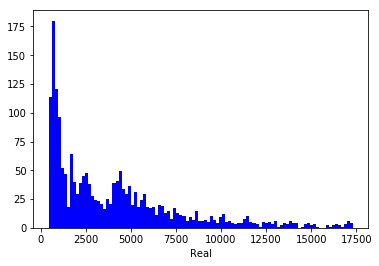

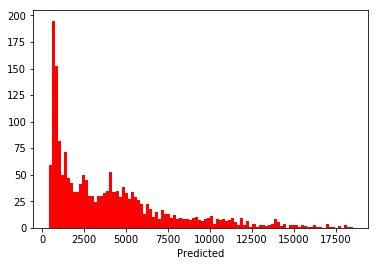

In [7]:
experiments.evaluate(y_pred=y_pred, y=y_test)

## Running the Nomal Equation to compare

In [8]:
experiments.kfold_evaluate(None, folds, scoring, log_y=True)

Evaluating 0
Evaluating 1
Evaluating 2
Evaluating 3
Evaluating 4
RMSE: 	 697.4931 +/- 17.2045
MSE:  	 486792.5749 +/- 24070.9568
MAE:  	 397.0396 +/- 10.4380
R2:   	 0.9657 +/- 0.0015


In [9]:
theta = normal_equation.normal_equation(X_train, np.log(y_train))
y_pred = np.exp(customSGD.predict(theta, X_test))

RMSE : 686.7947
MSE: 471686.9430
MAE: 385.2715
R2: 0.9641


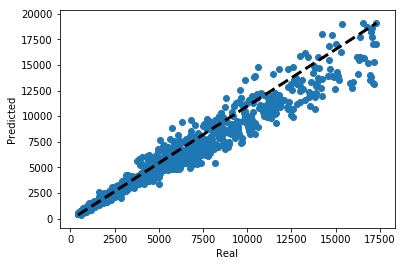

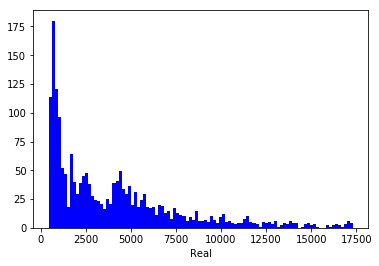

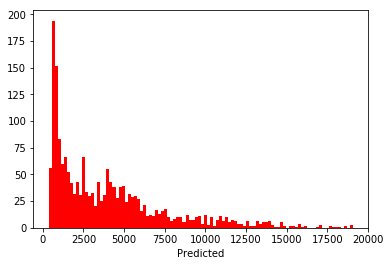

In [10]:
experiments.evaluate(y_pred=y_pred, y=y_test)

## Custom Predictor with the same SKLearn  SGDRegressor Parameters

In [11]:
experiments.kfold_evaluate("customSGD", folds, scoring, log_y=True)

Evaluating 0
Number of samples: 13491
Number of parameters: 13
It: 1 Batch: 1 Epoch 0 Error: 19.27687269 lr: 0.10000000 
It: 2000 Batch: 1 Epoch 1999 Error: 0.01853001 lr: 0.01495349 
It: 4000 Batch: 1 Epoch 3999 Error: 0.01283091 lr: 0.01257433 
It: 6000 Batch: 1 Epoch 5999 Error: 0.01057395 lr: 0.01136219 
It: 8000 Batch: 1 Epoch 7999 Error: 0.00955082 lr: 0.01057371 
It: 10000 Batch: 1 Epoch 9999 Error: 0.00904857 lr: 0.01000000 
It: 12000 Batch: 1 Epoch 11999 Error: 0.00878702 lr: 0.00955443 
It: 14000 Batch: 1 Epoch 13999 Error: 0.00864364 lr: 0.00919323 
It: 16000 Batch: 1 Epoch 15999 Error: 0.00856095 lr: 0.00889140 
It: 18000 Batch: 1 Epoch 17999 Error: 0.00851056 lr: 0.00863340 
It: 20000 Batch: 1 Epoch 19999 Error: 0.00847791 lr: 0.00840896 
Finished 
 It: 20000 Batch: 1 Epoch 19999 Error: 0.00847791 lr: 0.00840896 
Evaluating 1
Number of samples: 13491
Number of parameters: 13
It: 1 Batch: 1 Epoch 0 Error: 20.51861639 lr: 0.10000000 
It: 2000 Batch: 1 Epoch 1999 Error: 0.020

In [12]:
theta = customSGD.SGD(lr=0.1, max_iter=20000, X=X_train, y=np.log(y_train), lr_optimizer='invscaling', print_interval=2000)
y_pred = np.exp(customSGD.predict(theta, X_test))

Number of samples: 16864
Number of parameters: 13
It: 1 Batch: 1 Epoch 0 Error: 19.78556213 lr: 0.10000000 
It: 2000 Batch: 1 Epoch 1999 Error: 0.01766438 lr: 0.01495349 
It: 4000 Batch: 1 Epoch 3999 Error: 0.01228168 lr: 0.01257433 
It: 6000 Batch: 1 Epoch 5999 Error: 0.01013809 lr: 0.01136219 
It: 8000 Batch: 1 Epoch 7999 Error: 0.00916204 lr: 0.01057371 
It: 10000 Batch: 1 Epoch 9999 Error: 0.00868136 lr: 0.01000000 
It: 12000 Batch: 1 Epoch 11999 Error: 0.00843070 lr: 0.00955443 
It: 14000 Batch: 1 Epoch 13999 Error: 0.00829347 lr: 0.00919323 
It: 16000 Batch: 1 Epoch 15999 Error: 0.00821473 lr: 0.00889140 
It: 18000 Batch: 1 Epoch 17999 Error: 0.00816726 lr: 0.00863340 
It: 20000 Batch: 1 Epoch 19999 Error: 0.00813701 lr: 0.00840896 
Finished 
 It: 20000 Batch: 1 Epoch 19999 Error: 0.00813701 lr: 0.00840896 


RMSE : 724.9923
MSE: 525613.7730
MAE: 403.8708
R2: 0.9600


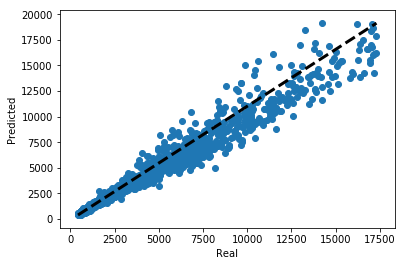

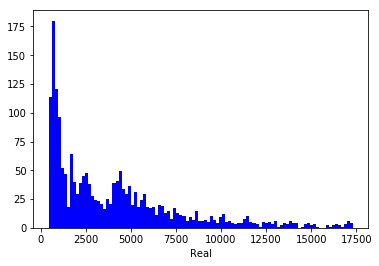

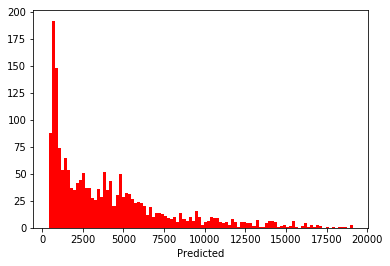

In [13]:
experiments.evaluate(y_pred=y_pred, y=y_test)